# Exploring Linear Regression with an Example. (Diamond)


Scenario: We need to Predict the price of a Diamond by different features.

# Importing All required packages

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
# allow plots to appear direcly in the notebook
%matplotlib inline
plotly.tools.set_credentials_file(username='sudhakar.anemu', api_key='gsV5SUHPip75363I87dw')
print("Import completed")

Import completed


In [0]:
#pip install plotly 

# Importing the Dataset (Diamond)

In [21]:
ds = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-2/master/Data/diamonds.csv', index_col=0)
ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Description of each Feature

S.No | Feature | Descripton|Range(DataSet) |
-|----------------|---------------|----|
1|Carat|Carat weight is the measurement of how much a diamond weighs.|0.2 to 5.01 Milligrams|
2|Cut|Style or Design of a Diamond|'Ideal' 'Premium' 'Good' 'Very Good' 'Fair'
3|Color|Color of the Diamond|'E' 'I' 'J' 'H' 'F' 'G' 'D'
4|Clarity|Flawless category (FL) diamonds have no inclusions or blemishes visible under 10x magnification.|'SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'
5|Depth|Depth of a Diamond|43 to 79 mm
6|Table|Lenght of flat face of a Diamond|43 to 95mm
7|Price|Price of a Diamond|326 $ to 18823 $



Price is the dependent variable where we need to predict this based on independent features like carat, cut, coloer, clarity, depth and table.

# EDA (Exploratory Data Analysis)

In [22]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Shape of the Dataset : ", ds.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Columns of the data frame : ",ds.columns)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Info of the Dataset : ", ds.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Description of the Dataset : ", ds.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Verify the count of Null", ds.isnull().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the Dataset :  (53940, 10)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns of the data frame :  Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
Info of the Dataset :  None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Description of the Dataset :                carat     

## Pre Profiling : 

SA : Price is the independent variable where it is dependent on Carat so analyzing how it is very correlated with Carat.
price is highly correlated with carat (ρ = 0.92159) Rejected

SA : Deleting below three features since these are highliy coreated with Carat

x is highly correlated with carat (ρ = 0.97509) Rejected
y is highly correlated with x (ρ = 0.9747) Rejected
z is highly correlated with y (ρ = 0.95201) Rejected



## FInding unique values of all Features

In [23]:
print("Dataframe Before Droping features : ", ds.columns)
ds.drop('x', axis=1, inplace=True)
ds.drop('y', axis=1, inplace=True)
ds.drop('z', axis=1, inplace=True)
print("Dataframe After Droping features : ", ds.columns)

Dataframe Before Droping features :  Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
Dataframe After Droping features :  Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')


In [24]:
colList = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']
for i in range(0,len(colList)):
    print("Name of the column : ",colList[i])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print(ds[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("End of For")

Name of the column :  carat
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 

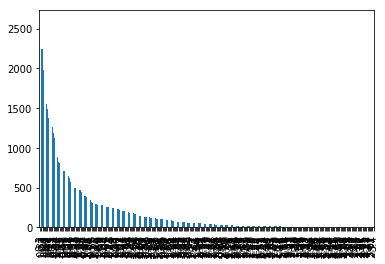

In [25]:
ds["carat"].value_counts().plot.bar()

In [0]:
ds["price"].value_counts().plot.bar()

## Distribution of Features

In [0]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)   

sns.despine(left=True) #It removes the border of each plot
sns.distplot(ds.carat, color="b", ax=axes[0, 0])
sns.distplot(ds.table, color="r", ax=axes[0, 1])
sns.distplot(ds.depth, color="y", ax=axes[1, 0])  

#
#SA : 
#1. This graph will not support for Category.
#2. sns.despine #It removes the border of each plot
#3 - #sns.distplot(ds.price, color="g", ax=axes[0, 1])  -- I removed this since it is effecting lot to other features since Price reange is very high if we compare with others. 
#

In [0]:
arr = ds["price"].unique()
print("Price data : ", arr)
print("Price data : Min", arr.min())
print("Price data : Max", arr.max())
print("Price data : Mean", arr.mean())
sns.set();
sns.distplot(ds.price, color="r", hist=True, kde=True)

In [0]:
arr = ds["carat"].unique()
print("carat data : ", arr)
print("carat data : Min", arr.min())
print("carat data : Max", arr.max())
print("carat data : Mean", arr.mean())
sns.set();
sns.distplot(ds.carat, color="g", hist=True, kde=True)

In [0]:
arr = ds["table"].unique()
print("table data : ", arr)
print("table data : Min", arr.min())
print("table data : Max", arr.max())
print("table data : Mean", arr.mean())
sns.set();
sns.distplot(ds.table, color="y", hist=True, kde=True)

In [0]:
arr = ds["depth"].unique()
print("depth data : ", arr)
print("depth data : Min", arr.min())
print("depth data : Max", arr.max())
print("depth data : Mean", arr.mean())
sns.set();
sns.distplot(ds.depth, color="b", hist=True, kde=True)

In [0]:
JG1 = sns.jointplot("carat", "price", data=ds, kind='reg')
JG2 = sns.jointplot("table", "price", data=ds, kind='reg')
JG3 = sns.jointplot("depth", "price", data=ds, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

# js SA tries


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

#py.plot(data, filename = 'basic-line', auto_open=True)
py.iplot(data, filename = 'basic-line')



In [0]:
import plotly
plotly.__version__

In [0]:
import plotly
import plotly.graph_objs as go

plotly.offline.plot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
}, auto_open=True)

In [0]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

fig = {
    'data': [
          {
          'x': df.gdpPercap, 
            'y': df.lifeExp, 
            'text': df.country, 
            'mode': 'markers', 
            'name': '2007'},
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}

#py.iplot(fig, filename='pandas-multiple-scatter')
py.iplot(fig)